# カルマンフィルタ

ここでは，Julia言語によるカルマンフィルタのアルゴリズムを紹介する．

In [1]:
using Plots

In [2]:
F = 1.005
H = 1
Q = 0.0025
R = 1
T = 200

200

In [3]:
v = √Q * randn(T,1)
w = √R * randn(T,1)

200×1 Array{Float64,2}:
  0.492792018875591  
  0.3519975755850958 
  0.1727054262938356 
  0.6768044615900056 
 -0.8504257260516407 
  0.49793563385548817
  0.6944706402590807 
  0.280814337231905  
 -0.22507849407031796
 -0.19603938189845013
  1.706637868911429  
  0.7982597907794975 
 -0.20178998973163223
  ⋮                  
  0.23334343852235157
 -0.38872490509716723
  1.283692791465333  
  0.14767111008497075
  0.43621368272120103
 -0.5842405266922448 
 -1.4464129585266003 
 -0.8046622984562859 
 -0.1006308538656158 
  0.7545063690870083 
  0.17759837034264223
  0.16524118831113616

In [4]:
x = √5*randn()
sqx = [x]
for t in 1:T
    x = F*x + v[t]
    push!(sqx,x)
end

In [5]:
y = sqx[2] + w[1]
sqy = [y]
for t in 2:T
y = sqx[t+1] + w[t]
    push!(sqy, y)
end

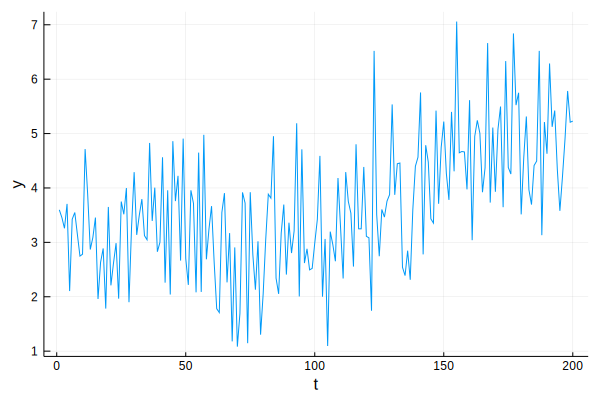

In [6]:
plot(sqy,leg=false,xlabel="t",ylabel="y")

In [7]:
X = sqy[1] - sqy[1] + 1
sqX = [ X ]

V = sqy[1] - sqy[1] + 5
sqV = [ V ]

for t in 1:T
    X = F*X
    V = F*V*F'+ Q
    K = V*H'/(H*V*H'+R)
    X = X + K*(sqy[t]-H*X)
    V = V - K*H*V
    
   push!(sqX, X)
   push!(sqV, V)
end

In [ ]:
plot([0:T],sqX,leg=false,xlabel="t",ylabel="x") #30
plot!([0:T],sqX + sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqX- sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqx,leg=false,xlabel="t",ylabel="x",linecolor=:red)